In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [21]:
import jieba

In [30]:
with open('test0.txt') as f:
    raw = f.read()


In [31]:
raw

'沙瑞金赞叹易学习的胸怀，是金山的百姓有福，可是这件事对李达康的触动很大。易学习又回忆起他们三人分开的前一晚，大家一起喝酒话别，易学习被降职到道口县当县长，王大路下海经商，李达康连连赔礼道歉，觉得对不起大家，他最对不起的是王大路，就和易学习一起给王大路凑了5万块钱，王大路自己东挪西撮了5万块，开始下海经商。没想到后来王大路竟然做得风生水起。沙瑞金觉得他们三人，在困难时期还能以沫相助，很不容易。'

In [32]:
raw_cut = jieba.cut(raw)
result = ' '.join(raw_cut)
result

'沙 瑞金 赞叹 易 学习 的 胸怀 ， 是 金山 的 百姓 有福 ， 可是 这件 事对 李达康 的 触动 很大 。 易 学习 又 回忆起 他们 三人 分开 的 前一晚 ， 大家 一起 喝酒 话别 ， 易 学习 被 降职 到 道口 县当 县长 ， 王 大路 下海经商 ， 李达康 连连 赔礼道歉 ， 觉得 对不起 大家 ， 他 最 对不起 的 是 王 大路 ， 就 和 易 学习 一起 给 王 大路 凑 了 5 万块 钱 ， 王 大路 自己 东挪西撮 了 5 万块 ， 开始 下海经商 。 没想到 后来 王 大路 竟然 做 得 风生水 起 。 沙 瑞金 觉得 他们 三人 ， 在 困难 时期 还 能 以沫 相助 ， 很 不 容易 。'

In [34]:
with open('test1.txt', 'w') as f1:
    f1.write(result)

315

In [35]:
f.close()
f1.close()

In [36]:
type(result)
len(result)

str

315

In [37]:
# 可以发现对于一些人名和地名，jieba处理的不好，不过我们可以帮jieba加入词汇如下：

jieba.suggest_freq('沙瑞金', True)
jieba.suggest_freq('易学习', True)
jieba.suggest_freq('王大路', True)
jieba.suggest_freq('京州', True)

1

2

1

2

In [40]:
# 现在我们再来进行读文件，编码，分词，编码和写文件，代码如下：

with open('test0.txt') as f:
    raw1 = f.read()
    
    raw1_cut = jieba.cut(raw1)
    result1 = ' '.join(raw1_cut)
    with open('testmodified.txt','w') as f2:
        f2.write(result1)

f.close()
f2.close()

304

In [41]:
result1

'沙瑞金 赞叹 易学习 的 胸怀 ， 是 金山 的 百姓 有福 ， 可是 这件 事对 李达康 的 触动 很大 。 易学习 又 回忆起 他们 三人 分开 的 前一晚 ， 大家 一起 喝酒 话别 ， 易学习 被 降职 到 道口 县当 县长 ， 王大路 下海经商 ， 李达康 连连 赔礼道歉 ， 觉得 对不起 大家 ， 他 最 对不起 的 是 王大路 ， 就 和 易学习 一起 给 王大路 凑 了 5 万块 钱 ， 王大路 自己 东挪西撮 了 5 万块 ， 开始 下海经商 。 没想到 后来 王大路 竟然 做 得 风生水 起 。 沙瑞金 觉得 他们 三人 ， 在 困难 时期 还 能 以沫 相助 ， 很 不 容易 。'

### 对第二个文本进行分词

In [42]:
with open('test2.txt') as f2:
    raw2 = f2.read()
    jieba.suggest_freq('欧阳菁', True)
    raw2_cut = jieba.cut(raw2)
    result2 = ' '.join(raw2_cut)
    with open('test3.txt','w') as f3:
        f3.write(result2)
f2.close()
f3.close()

1

213

In [43]:
result2

'沙瑞金 向 毛娅 打听 他们 家 在 京州 的 别墅 ， 毛娅 笑 着 说 ， 王大路 事业有成 之后 ， 要 给 欧阳菁 和 她 公司 的 股权 ， 她们 没有 要 ， 王大路 就 在 京州 帝豪园 买 了 三套 别墅 ， 可是 李达康 和 易学习 都 不要 ， 这些 房子 都 在 王大路 的 名下 ， 欧阳菁 好像 去 住 过 ， 毛娅 不想 去 ， 她 觉得 房子 太大 很 浪费 ， 自己 家住 得 就 很 踏实 。'

## 引入停用词

In [59]:
# 将代码汇总如下：
swdic = open('stop_words.txt', 'rb')
sw = swdic.read().decode('GBK')
swlist = sw.splitlines()
swdic.close()

In [55]:
#从文件导入停用词表

swdic = open('stop_words.txt','rb')
swdic

<_io.BufferedReader name='stop_words.txt'>

In [56]:
sw = swdic.read().decode('GBK')
sw

',\r\n?\r\n、\r\n。\r\n“\r\n”\r\n《\r\n》\r\n！\r\n，\r\n：\r\n；\r\n？\r\n人民\r\n末##末\r\n啊\r\n阿\r\n哎\r\n哎呀\r\n哎哟\r\n唉\r\n俺\r\n俺们\r\n按\r\n按照\r\n吧\r\n吧哒\r\n把\r\n罢了\r\n被\r\n本\r\n本着\r\n比\r\n比方\r\n比如\r\n鄙人\r\n彼\r\n彼此\r\n边\r\n别\r\n别的\r\n别说\r\n并\r\n并且\r\n不比\r\n不成\r\n不单\r\n不但\r\n不独\r\n不管\r\n不光\r\n不过\r\n不仅\r\n不拘\r\n不论\r\n不怕\r\n不然\r\n不如\r\n不特\r\n不惟\r\n不问\r\n不只\r\n朝\r\n朝着\r\n趁\r\n趁着\r\n乘\r\n冲\r\n除\r\n除此之外\r\n除非\r\n除了\r\n此\r\n此间\r\n此外\r\n从\r\n从而\r\n打\r\n待\r\n但\r\n但是\r\n当\r\n当着\r\n到\r\n得\r\n的\r\n的话\r\n等\r\n等等\r\n地\r\n第\r\n叮咚\r\n对\r\n对于\r\n多\r\n多少\r\n而\r\n而况\r\n而且\r\n而是\r\n而外\r\n而言\r\n而已\r\n尔后\r\n反过来\r\n反过来说\r\n反之\r\n非但\r\n非徒\r\n否则\r\n嘎\r\n嘎登\r\n该\r\n赶\r\n个\r\n各\r\n各个\r\n各位\r\n各种\r\n各自\r\n给\r\n根据\r\n跟\r\n故\r\n故此\r\n固然\r\n关于\r\n管\r\n归\r\n果然\r\n果真\r\n过\r\n哈\r\n哈哈\r\n呵\r\n和\r\n何\r\n何处\r\n何况\r\n何时\r\n嘿\r\n哼\r\n哼唷\r\n呼哧\r\n乎\r\n哗\r\n还是\r\n还有\r\n换句话说\r\n换言之\r\n或\r\n或是\r\n或者\r\n极了\r\n及\r\n及其\r\n及至\r\n即\r\n即便\r\n即或\r\n即令\r\n即若\r\n即使\r\n几\r\n几时\r\n己\r\n既\r\n既然\r\n既是\r\n继而\r\n加之\r\n假如\r\n假若\r\n假使\r\n鉴于\r\n将\r\n较\r\n较之

In [57]:
# 将停用词转化为list
swlist = sw.splitlines()
swlist

[',',
 '?',
 '、',
 '。',
 '“',
 '”',
 '《',
 '》',
 '！',
 '，',
 '：',
 '；',
 '？',
 '人民',
 '末##末',
 '啊',
 '阿',
 '哎',
 '哎呀',
 '哎哟',
 '唉',
 '俺',
 '俺们',
 '按',
 '按照',
 '吧',
 '吧哒',
 '把',
 '罢了',
 '被',
 '本',
 '本着',
 '比',
 '比方',
 '比如',
 '鄙人',
 '彼',
 '彼此',
 '边',
 '别',
 '别的',
 '别说',
 '并',
 '并且',
 '不比',
 '不成',
 '不单',
 '不但',
 '不独',
 '不管',
 '不光',
 '不过',
 '不仅',
 '不拘',
 '不论',
 '不怕',
 '不然',
 '不如',
 '不特',
 '不惟',
 '不问',
 '不只',
 '朝',
 '朝着',
 '趁',
 '趁着',
 '乘',
 '冲',
 '除',
 '除此之外',
 '除非',
 '除了',
 '此',
 '此间',
 '此外',
 '从',
 '从而',
 '打',
 '待',
 '但',
 '但是',
 '当',
 '当着',
 '到',
 '得',
 '的',
 '的话',
 '等',
 '等等',
 '地',
 '第',
 '叮咚',
 '对',
 '对于',
 '多',
 '多少',
 '而',
 '而况',
 '而且',
 '而是',
 '而外',
 '而言',
 '而已',
 '尔后',
 '反过来',
 '反过来说',
 '反之',
 '非但',
 '非徒',
 '否则',
 '嘎',
 '嘎登',
 '该',
 '赶',
 '个',
 '各',
 '各个',
 '各位',
 '各种',
 '各自',
 '给',
 '根据',
 '跟',
 '故',
 '故此',
 '固然',
 '关于',
 '管',
 '归',
 '果然',
 '果真',
 '过',
 '哈',
 '哈哈',
 '呵',
 '和',
 '何',
 '何处',
 '何况',
 '何时',
 '嘿',
 '哼',
 '哼唷',
 '呼哧',
 '乎',
 '哗',
 '还是',
 '还有',
 '换句话说',
 '换言之',
 '或',
 

In [58]:
swdic.close()

## 特征处理

In [60]:
with open('test1.txt') as f1:
    raw1 = f1.read()
print(raw1)

with open('test3.txt') as f3:
    raw3 = f3.read()
print(raw3)

沙 瑞金 赞叹 易 学习 的 胸怀 ， 是 金山 的 百姓 有福 ， 可是 这件 事对 李达康 的 触动 很大 。 易 学习 又 回忆起 他们 三人 分开 的 前一晚 ， 大家 一起 喝酒 话别 ， 易 学习 被 降职 到 道口 县当 县长 ， 王 大路 下海经商 ， 李达康 连连 赔礼道歉 ， 觉得 对不起 大家 ， 他 最 对不起 的 是 王 大路 ， 就 和 易 学习 一起 给 王 大路 凑 了 5 万块 钱 ， 王 大路 自己 东挪西撮 了 5 万块 ， 开始 下海经商 。 没想到 后来 王 大路 竟然 做 得 风生水 起 。 沙 瑞金 觉得 他们 三人 ， 在 困难 时期 还 能 以沫 相助 ， 很 不 容易 。
沙瑞金 向 毛娅 打听 他们 家 在 京州 的 别墅 ， 毛娅 笑 着 说 ， 王大路 事业有成 之后 ， 要 给 欧阳菁 和 她 公司 的 股权 ， 她们 没有 要 ， 王大路 就 在 京州 帝豪园 买 了 三套 别墅 ， 可是 李达康 和 易学习 都 不要 ， 这些 房子 都 在 王大路 的 名下 ， 欧阳菁 好像 去 住 过 ， 毛娅 不想 去 ， 她 觉得 房子 太大 很 浪费 ， 自己 家住 得 就 很 踏实 。


In [99]:
type(raw1)
type(raw3)

str

str

In [61]:
# 现在我们可以进行向量化，TF-IDF和标准化三步处理了。
# 注意，这里我们引入了我们上面的停用词表。

from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [raw1, raw3]
vector = TfidfVectorizer(stop_words = swlist)
tfidf = vector.fit_transform(corpus)
print(tfidf)

# 左边括号中第一个数字是文本的序号，第2个数字是词的序号，词的序号是基于所有文档的
# 第3个数字是词频

  (0, 43)	0.204071059904
  (0, 52)	0.102035529952
  (0, 25)	0.408142119807
  (0, 47)	0.102035529952
  (0, 56)	0.102035529952
  (0, 44)	0.102035529952
  (0, 35)	0.102035529952
  (0, 54)	0.102035529952
  (0, 9)	0.102035529952
  (0, 36)	0.145198239875
  (0, 49)	0.102035529952
  (0, 30)	0.102035529952
  (0, 20)	0.102035529952
  (0, 2)	0.204071059904
  (0, 13)	0.102035529952
  (0, 15)	0.102035529952
  (0, 0)	0.204071059904
  (0, 19)	0.102035529952
  (0, 50)	0.102035529952
  (0, 57)	0.102035529952
  (0, 55)	0.102035529952
  (0, 16)	0.102035529952
  (0, 17)	0.102035529952
  (0, 22)	0.510177649759
  (0, 4)	0.204071059904
  :	:
  (0, 27)	0.102035529952
  (1, 36)	0.0996188855943
  (1, 48)	0.0996188855943
  (1, 39)	0.140010867811
  (1, 38)	0.420032603434
  (1, 32)	0.140010867811
  (1, 10)	0.280021735623
  (1, 14)	0.280021735623
  (1, 42)	0.420032603434
  (1, 8)	0.140010867811
  (1, 7)	0.140010867811
  (1, 37)	0.280021735623
  (1, 12)	0.140010867811
  (1, 46)	0.140010867811
  (1, 29)	0.14001086781

In [62]:
# 再来看看每次词和TF-IDF的对应关系

wordlist = vector.get_feature_names() #获取词袋模型中的所有词
weightlist = tfidf.toarray()
for i in range(len(weightlist)):
    print('------第',i,'段文本的词语tf-idf权重为：')
    for j in range(len(wordlist)):
        print(wordlist[j], weightlist[i][j])

------第 0 段文本的词语tf-idf权重为：
一起 0.204071059904
万块 0.204071059904
三人 0.204071059904
三套 0.0
下海经商 0.204071059904
不想 0.0
东挪西撮 0.102035529952
之后 0.0
事业有成 0.0
事对 0.102035529952
京州 0.0
以沫 0.102035529952
公司 0.0
分开 0.102035529952
别墅 0.0
前一晚 0.102035529952
县当 0.102035529952
县长 0.102035529952
名下 0.0
喝酒 0.102035529952
回忆起 0.102035529952
困难 0.102035529952
大路 0.510177649759
太大 0.0
好像 0.0
学习 0.408142119807
家住 0.0
容易 0.102035529952
对不起 0.204071059904
帝豪园 0.0
很大 0.102035529952
房子 0.0
打听 0.0
时期 0.102035529952
易学习 0.0
有福 0.102035529952
李达康 0.145198239875
欧阳菁 0.0
毛娅 0.0
沙瑞金 0.0
没想到 0.102035529952
浪费 0.0
王大路 0.0
瑞金 0.204071059904
百姓 0.102035529952
相助 0.102035529952
股权 0.0
胸怀 0.102035529952
觉得 0.145198239875
触动 0.102035529952
话别 0.102035529952
赔礼道歉 0.102035529952
赞叹 0.102035529952
踏实 0.0
这件 0.102035529952
道口 0.102035529952
金山 0.102035529952
降职 0.102035529952
风生水 0.102035529952
------第 1 段文本的词语tf-idf权重为：
一起 0.0
万块 0.0
三人 0.0
三套 0.140010867811
下海经商 0.0
不想 0.140010867811
东挪西撮 0.0
之后 0.140010867811
事业有成 0.1400108

# 用NLTK试试

In [64]:
import nltk

In [66]:
with open('test2.txt') as f2:
    raw2 = f2.read()
    jieba.suggest_freq('欧阳菁', True)
    raw2_cut = jieba.cut(raw2)
    result2 = ' '.join(raw2_cut)
    with open('test3.txt','w') as f3:
        f3.write(result2)
f2.close()
f3.close()

2

213

In [67]:
with open('test3.txt') as f:
    test = f.read()

In [68]:
test

'沙瑞金 向 毛娅 打听 他们 家 在 京州 的 别墅 ， 毛娅 笑 着 说 ， 王大路 事业有成 之后 ， 要 给 欧阳菁 和 她 公司 的 股权 ， 她们 没有 要 ， 王大路 就 在 京州 帝豪园 买 了 三套 别墅 ， 可是 李达康 和 易学习 都 不要 ， 这些 房子 都 在 王大路 的 名下 ， 欧阳菁 好像 去 住 过 ， 毛娅 不想 去 ， 她 觉得 房子 太大 很 浪费 ， 自己 家住 得 就 很 踏实 。'

In [75]:
tokens = nltk.word_tokenize(test)
tokens[:10]

['沙瑞金', '向', '毛娅', '打听', '他们', '家', '在', '京州', '的', '别墅']

In [76]:
text1 = nltk.Text(tokens)
text1

<Text: 沙瑞金 向 毛娅 打听 他们 家 在 京州...>

In [77]:
type(text1)

nltk.text.Text

In [78]:
text1[:10]

['沙瑞金', '向', '毛娅', '打听', '他们', '家', '在', '京州', '的', '别墅']

In [90]:
text_nsw = [w for w in text1 if w not in swlist]

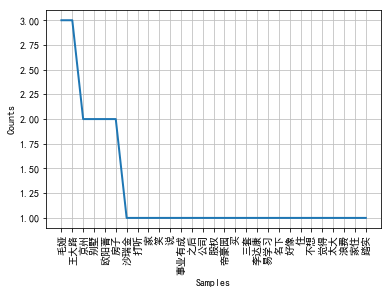

In [91]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
fdist = nltk.FreqDist(text_nsw)
fdist.plot()

In [92]:
fdist

FreqDist({'三套': 1,
          '不想': 1,
          '之后': 1,
          '买': 1,
          '事业有成': 1,
          '京州': 2,
          '住': 1,
          '公司': 1,
          '别墅': 2,
          '名下': 1,
          '太大': 1,
          '好像': 1,
          '家': 1,
          '家住': 1,
          '帝豪园': 1,
          '房子': 2,
          '打听': 1,
          '易学习': 1,
          '李达康': 1,
          '欧阳菁': 2,
          '毛娅': 3,
          '沙瑞金': 1,
          '浪费': 1,
          '王大路': 3,
          '笑': 1,
          '股权': 1,
          '觉得': 1,
          '说': 1,
          '踏实': 1})

In [93]:
fdist.most_common(10)

[('毛娅', 3),
 ('王大路', 3),
 ('京州', 2),
 ('别墅', 2),
 ('欧阳菁', 2),
 ('房子', 2),
 ('沙瑞金', 1),
 ('打听', 1),
 ('家', 1),
 ('笑', 1)]

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer.fit_transform(test)

TypeError: fit_transform() missing 1 required positional argument: 'raw_documents'